# Importing libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
%matplotlib inline

# Input variables

In [2]:
stock = ctrl.Antecedent(np.arange(0, 11, 1), 'stock')
budget = ctrl.Antecedent(np.arange(0, 11, 1), 'budget')
demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')

## Stock

In [3]:
stock['low'] = fuzz.trimf(stock.universe, [0, 0, 3])
stock['medium'] = fuzz.trimf(stock.universe, [2, 5, 8])
stock['high'] = fuzz.trimf(stock.universe, [7, 10, 10])

E:\Installed_Softwares\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


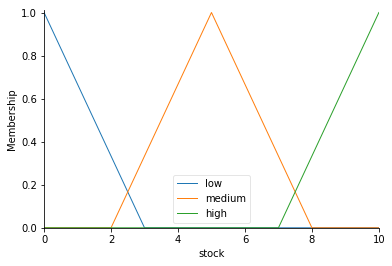

In [4]:
stock.view()

## Budget

In [5]:
budget['low'] = fuzz.sigmf(budget.universe, 2, -4)
budget['medium'] = fuzz.gaussmf(budget.universe, 5, 1)
budget['high'] = fuzz.sigmf(budget.universe, 8, 4)

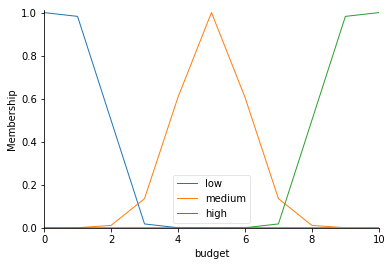

In [6]:
budget.view()

## Demand

In [7]:
demand['low'] = fuzz.trimf(demand.universe, [0, 0, 3])
demand['medium'] = fuzz.trimf(demand.universe, [2, 5, 8])
demand['high'] = fuzz.trimf(demand.universe, [7, 10, 10])

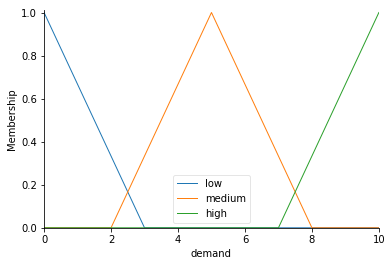

In [8]:
demand.view()

# Output  variables

In [9]:
order = ctrl.Consequent(np.arange(0, 11), 'order')

#order['none'] = fuzz.trapmf(order.universe, [0, 0, 10, 10])
order['none'] = fuzz.trimf(order.universe, [0, 0, 2])
order['some'] = fuzz.trimf(order.universe, [1, 3, 5])
order['half'] = fuzz.trimf(order.universe, [4, 5, 6])
order['more_than_half'] = fuzz.trimf(order.universe, [5, 7, 9])
order['all'] = fuzz.trimf(order.universe, [8, 10, 10])
#order['all'] = fuzz.trimf(order.universe, [0, 0.1, 0.2])

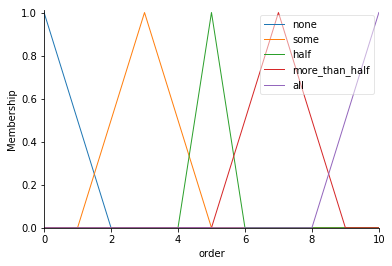

In [10]:
order.view()

# Rule Base

In [11]:
rule_1 = ctrl.Rule(stock['low'] & demand['low'] & budget['low'], order['none'])
rule_2 = ctrl.Rule(stock['low'] & demand['low'] & budget['medium'], order['some'])
rule_3 = ctrl.Rule(stock['low'] & demand['low'] & budget['high'], order['half'])

rule_4 = ctrl.Rule(stock['low'] & demand['medium'] & budget['low'], order['some'])
rule_5 = ctrl.Rule(stock['low'] & demand['medium'] & budget['medium'], order['half'])
rule_6 = ctrl.Rule(stock['low'] & demand['medium'] & budget['high'], order['more_than_half'])

rule_7 = ctrl.Rule(stock['low'] & demand['high'] & budget['low'], order['some'])
rule_8 = ctrl.Rule(stock['low'] & demand['high'] & budget['medium'], order['half'])
rule_9 = ctrl.Rule(stock['low'] & demand['high'] & budget['high'], order['all'])

rule_10 = ctrl.Rule(stock['medium'] & demand['low'] & budget['low'], order['none'])
rule_11 = ctrl.Rule(stock['medium'] & demand['low'] & budget['medium'], order['none'])
rule_12 = ctrl.Rule(stock['medium'] & demand['low'] & budget['high'], order['some'])

rule_13 = ctrl.Rule(stock['medium'] & demand['medium'] & budget['low'], order['none'])
rule_14 = ctrl.Rule(stock['medium'] & demand['medium'] & budget['medium'], order['some'])
rule_15 = ctrl.Rule(stock['medium'] & demand['medium'] & budget['high'], order['more_than_half'])

rule_16 = ctrl.Rule(stock['medium'] & demand['high'] & budget['low'], order['some'])
rule_17 = ctrl.Rule(stock['medium'] & demand['high'] & budget['medium'], order['more_than_half'])
rule_18 = ctrl.Rule(stock['medium'] & demand['high'] & budget['high'], order['all'])

rule_19 = ctrl.Rule(stock['high'], order['none'])

# Creating fuzzy logic controller

In [12]:
order_control = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5,
                                    rule_6, rule_7, rule_8, rule_9, rule_10,
                                    rule_11, rule_12, rule_13, rule_14, rule_15,
                                    rule_16, rule_17, rule_18, rule_19])

order_output = ctrl.ControlSystemSimulation(order_control)

# Example executions

## Example no 1

### Taking user inputs for inferencing

In [13]:
order_output.input['stock'] = 4
order_output.input['budget'] = 9.8
order_output.input['demand'] = 9.4

### Inferencing

Order has the value of:  9.277


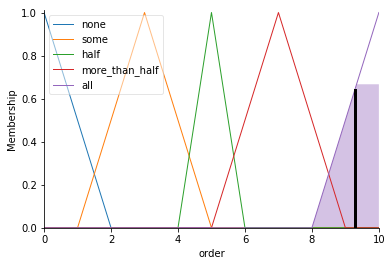

In [14]:
order_output.compute()
order.view(sim=order_output)
print('Order has the value of: ', round(order_output.output['order'], 3))

## Example no 2

Order has the value of:  6.999


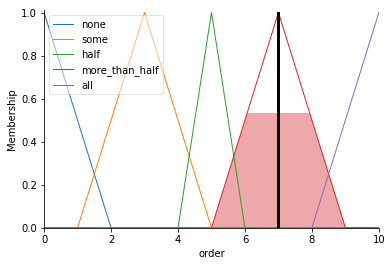

In [15]:
order_output.input['stock'] = 1.2
order_output.input['budget'] = 9.3
order_output.input['demand'] = 6.4

order_output.compute()

order.view(sim=order_output)
print('Order has the value of: ', round(order_output.output['order'], 3))

## Example no 3

Order has the value of:  0.689


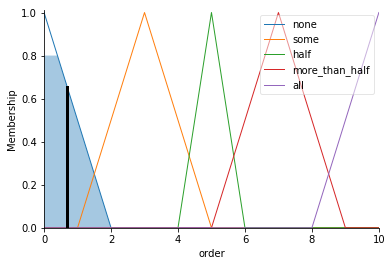

In [16]:
order_output.input['stock'] = 9.4
order_output.input['budget'] = 2.3
order_output.input['demand'] = 4.5

order_output.compute()

order.view(sim=order_output)
print('Order has the value of: ', round(order_output.output['order'], 3))